# NBA 實作案例

 1. 載入資料
 2. 檢視資料
 3. 資料探索
 3. 切分資料集成訓練集/測試集
 4. 建立模型 / 評估模型
 5. 增加特徵再進行模型預測評估

# Import 所需檔案

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import string
import random
import seaborn as sns

from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 讀取CSV

In [2]:
nba = pd.read_csv('nba_logreg.csv')

# 查看資料集資訊

In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
Name           1340 non-null object
GP             1340 non-null int64
MIN            1340 non-null float64
PTS            1340 non-null float64
FGM            1340 non-null float64
FGA            1340 non-null float64
FG%            1340 non-null float64
3P Made        1340 non-null float64
3PA            1340 non-null float64
3P%            1329 non-null float64
FTM            1340 non-null float64
FTA            1340 non-null float64
FT%            1340 non-null float64
OREB           1340 non-null float64
DREB           1340 non-null float64
REB            1340 non-null float64
AST            1340 non-null float64
STL            1340 non-null float64
BLK            1340 non-null float64
TOV            1340 non-null float64
TARGET_5Yrs    1340 non-null float64
dtypes: float64(19), int64(1), object(1)
memory usage: 219.9+ KB


In [4]:
#查看有哪些feature是可以用的
print(nba.keys())

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')


In [5]:
#查看shape
print(nba.shape)

(1340, 21)


### 資料描述

這個資料集包含了
* $1340$筆資料
* $21$個欄位
* $1$待預測值：TARGET_5Yrs

# 查看前五筆資料觀察資料型態
- 最後一項TARGET_5Yrs為預測標的

In [6]:
#查看前5項資料
nba.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


# 查看目前target分佈

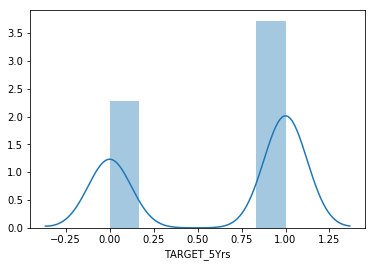

In [7]:
#使用distplot畫出分佈
sns.distplot(nba["TARGET_5Yrs"])

In [8]:
#查看各統計量
nba.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


## 探索各欄位與TARGET_5Yrs的關係
- 先以correlation matrix檢查個相關係數
- 我們使用heatmap先對剛剛的假設做快速的檢驗

In [9]:
nba.corr()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
GP,1.000000,0.590240,0.538471,0.542724,0.516625,0.296289,0.107423,0.098772,0.038209,0.482123,0.479487,0.196299,0.401136,0.466840,0.460406,0.372749,0.451137,0.276498,0.518167,0.396833
MIN,0.590240,1.000000,0.911822,0.903060,0.910247,0.203901,0.389920,0.403258,0.165997,0.791000,0.779609,0.239878,0.573062,0.745513,0.709707,0.629015,0.757034,0.399088,0.826500,0.317805
PTS,0.538471,0.911822,1.000000,0.990834,0.979733,0.255333,0.346682,0.356751,0.151072,0.896297,0.880703,0.258931,0.575106,0.693934,0.676849,0.552338,0.675341,0.387043,0.850366,0.315981
FGM,0.542724,0.903060,0.990834,1.000000,0.980050,0.291693,0.289007,0.299057,0.119493,0.848019,0.840408,0.223566,0.596687,0.703278,0.691186,0.532534,0.662640,0.398125,0.834352,0.317594
FGA,0.516625,0.910247,0.979733,0.980050,1.000000,0.129798,0.390253,0.413560,0.197160,0.826616,0.805559,0.269614,0.504212,0.640123,0.614328,0.589818,0.690168,0.322184,0.845989,0.292660
FG%,0.296289,0.203901,0.255333,0.291693,0.129798,1.000000,-0.294471,-0.350658,-0.330690,0.245776,0.300154,-0.161183,0.511367,0.410555,0.465423,-0.108797,0.056658,0.391626,0.121806,0.227134
3P Made,0.107423,0.389920,0.346682,0.289007,0.390253,-0.294471,1.000000,0.982616,0.589855,0.158472,0.095396,0.314355,-0.219010,0.016570,-0.072503,0.376604,0.306908,-0.158535,0.258369,0.036619
3PA,0.098772,0.403258,0.356751,0.299057,0.413560,-0.350658,0.982616,1.000000,0.582337,0.173533,0.108388,0.323612,-0.231897,0.011226,-0.080939,0.410531,0.338631,-0.172150,0.283925,0.018110
3P%,0.038209,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,-0.032333,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277,-0.003411
FTM,0.482123,0.791000,0.896297,0.848019,0.826616,0.245776,0.158472,0.173533,0.030320,1.000000,0.980505,0.257818,0.583865,0.653823,0.653833,0.476214,0.600158,0.407466,0.804990,0.296841


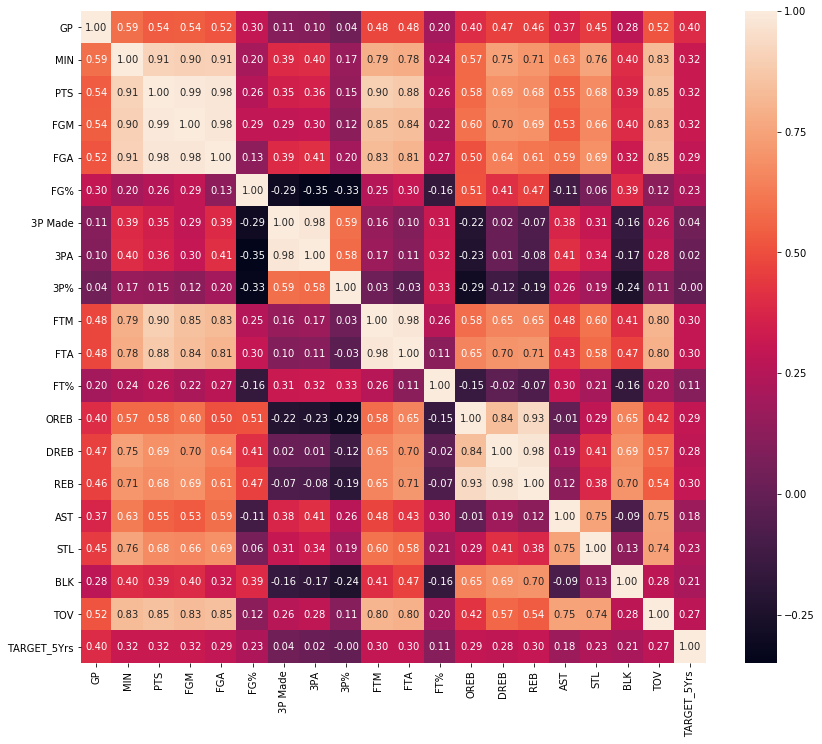

In [10]:
#使用seaborn畫出heatmap

plt.rcParams['figure.figsize'] = (14,12)

#heatmap第一個參數為放入要畫得值，annot為每一個方格是否要填入數值，fmt為只留到小數第二位
sns.heatmap(nba.corr(),annot = nba.corr(),fmt = '.2f');

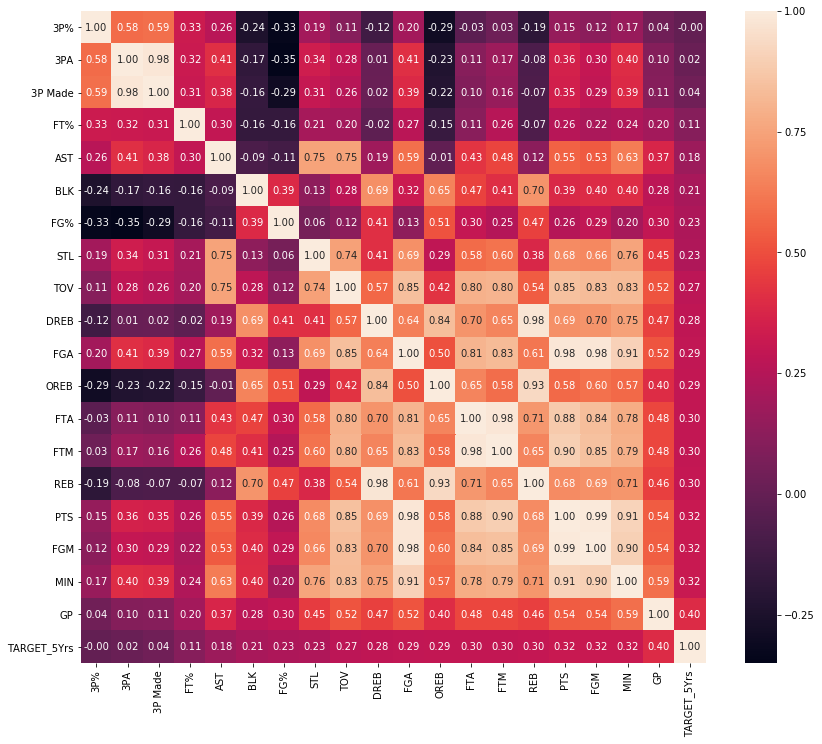

In [11]:
#畫出heatmap
plt.rcParams['figure.figsize'] = (14,12)

#取index當作排序的依據
sort_columns = nba.corr().sort_values('TARGET_5Yrs').index
corr = nba[sort_columns].corr()

#annot為在上面呈現的數字
#".2f"表示float类型保留小数点后两位。
sns.heatmap(corr, annot=corr, fmt = '.2f')

# 使用pairplot觀察整體的資料分佈

In [22]:
#sns.pairplot(nba)

# 接著可以選擇自己有興趣的feature兩兩觀察看看
可藉由heat map來看看有哪些是有關聯的

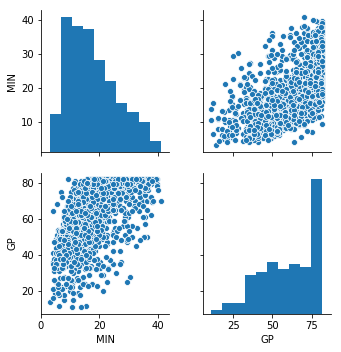

In [23]:
#先來看看MIN與GP
sns.pairplot(nba[['MIN','GP']])

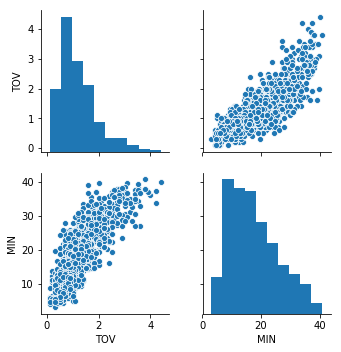

In [24]:
#TOV,MIN
sns.pairplot(nba[['TOV','MIN']])

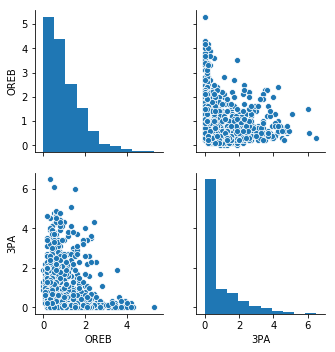

In [9]:
# 也可看看負關係的資料分布
sns.pairplot(nba[['OREB','3PA']])

# 還有哪些資料是可以用的呢？
- 可以試著使用不同的圖觀察看看

# 也可使用boxplot觀察資料的極距

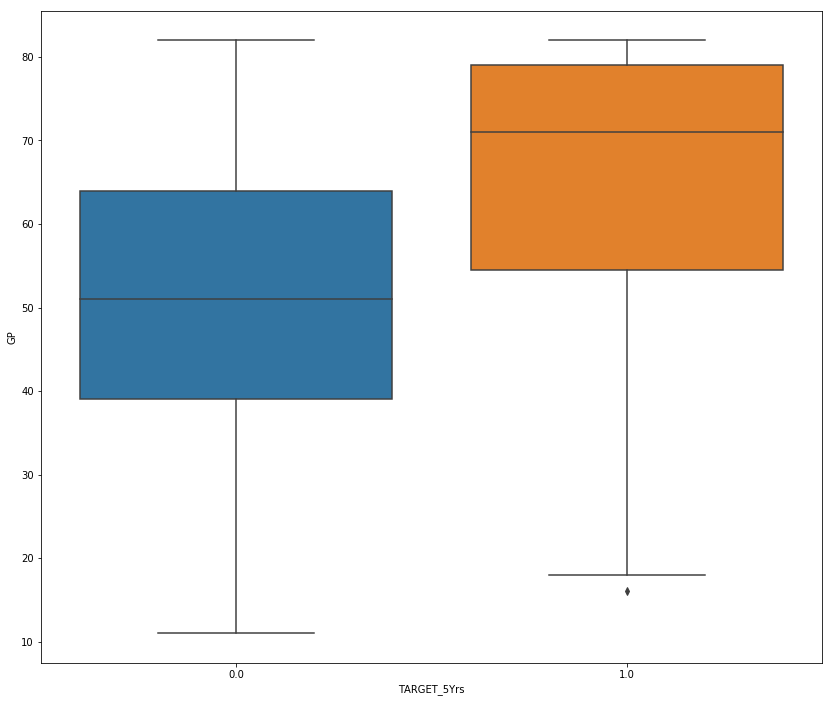

In [26]:
#試著以極距來觀察
sns.boxplot(x = 'TARGET_5Yrs', y = 'GP', data = nba)

# 動手做做看
- 找出與target最無相關性的feature，並以boxplot觀察看看

In [11]:
#解
#sns.boxplot(x = 'TARGET_5Yrs', y = '3PA', data = nba)

# 補缺失值
- 看完分佈以後接著來查看是否有缺失值

# 查看缺失值

In [12]:
#用isnull統計缺失值
nba.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [14]:
nba[nba['3P%'].isnull()]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


In [18]:
nba.iloc[559:560]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
559,Jeff Wilkins,56,18.9,4.7,2.1,4.6,45.0,0.0,0.0,NaN,...,0.7,67.5,1.1,3.8,4.9,0.7,0.6,0.8,1.1,1.0


In [13]:
#用dataframe畫出來看是哪些有問題
df_null = nba[nba['3P%'].isnull()]
df_null

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


In [ ]:
df_null_1 = n

In [20]:
#補值
nba.loc[nba['3P%'].isnull(), '3P%'] = nba.loc[nba['3P%'].isnull(), '3PA']

In [22]:
nba[559:560]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
559,Jeff Wilkins,56,18.9,4.7,2.1,4.6,45.0,0.0,0.0,0.0,...,0.7,67.5,1.1,3.8,4.9,0.7,0.6,0.8,1.1,1.0


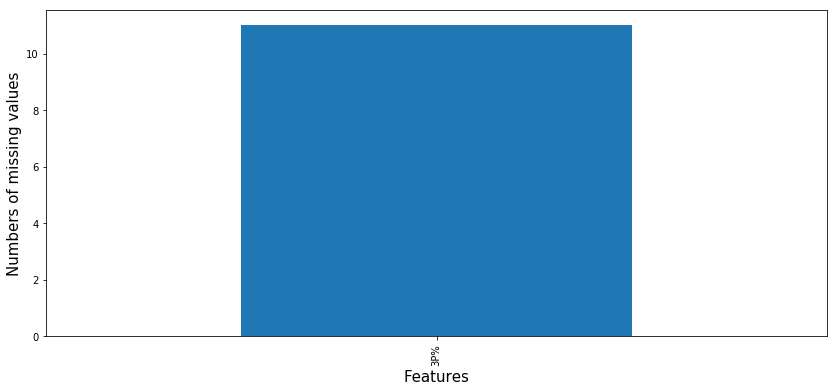

In [14]:
#以條狀圖畫出缺失值
_, axes = plt.subplots(figsize=(14, 6))
#將缺失值加總起來並畫出
missing = nba.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Numbers of missing values', fontsize=15)
missing.plot.bar()

# 補缺值

In [15]:
#經過觀察過後發現是3P%這個值為NaN
nba['3P%'] = nba['3P%'].fillna(0)

In [16]:
#查看是否有補進去
nba.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

# 切分資料
- 補完資料後接著可以來準備訓練model

In [17]:
#指定欄位
X = nba.iloc[:, 1:-1]
y = nba.iloc[:, 20]

In [20]:
#可以印出來看看是否有拿到正確的值
#print(X)
#print(y)

# import sklearn 套件切分資料
*   test_size表示測試集在資料庫的比重 ( 通常設定0.2~0.3 )
*   shuffle = True代表打亂順序
*   可以觀察training data 與 test data 的shape發生變化

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(938, 19)
(402, 19)
(938,)
(402,)


# 資料標準化

In [23]:
#進行資料標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LogisticRegression
- 可以自己嘗試修改參數

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#查看 confusion_matrix
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 79,  77],
       [ 34, 212]])

In [29]:
#印出f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')  

0.7925233644859814

In [30]:
pd.value_counts(y_pred)

1.0    289
0.0    113
dtype: int64

Accuracy:  0.7238805970149254
              precision    recall  f1-score   support

           0       0.70      0.51      0.59       156
           1       0.73      0.86      0.79       246

    accuracy                           0.72       402
   macro avg       0.72      0.68      0.69       402
weighted avg       0.72      0.72      0.71       402



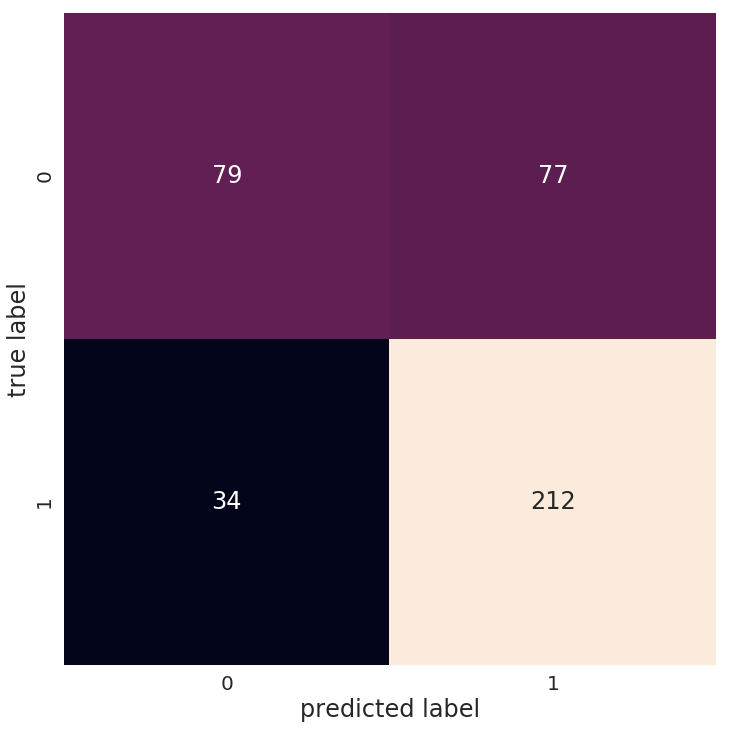

In [32]:
from sklearn.metrics import accuracy_score ,classification_report

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_pred, y_test)
sns.set(font_scale=2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('true label')
plt.xlabel('predicted label');

print(classification_report(y_test,y_pred,target_names=['0','1']))

# SVM

In [34]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
#查看 confusion_matrix
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 80,  76],
       [ 38, 208]])

In [36]:
#印出f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')  

0.7849056603773586

Accuracy:  0.7164179104477612
              precision    recall  f1-score   support

           0       0.68      0.51      0.58       156
           1       0.73      0.85      0.78       246

    accuracy                           0.72       402
   macro avg       0.71      0.68      0.68       402
weighted avg       0.71      0.72      0.71       402



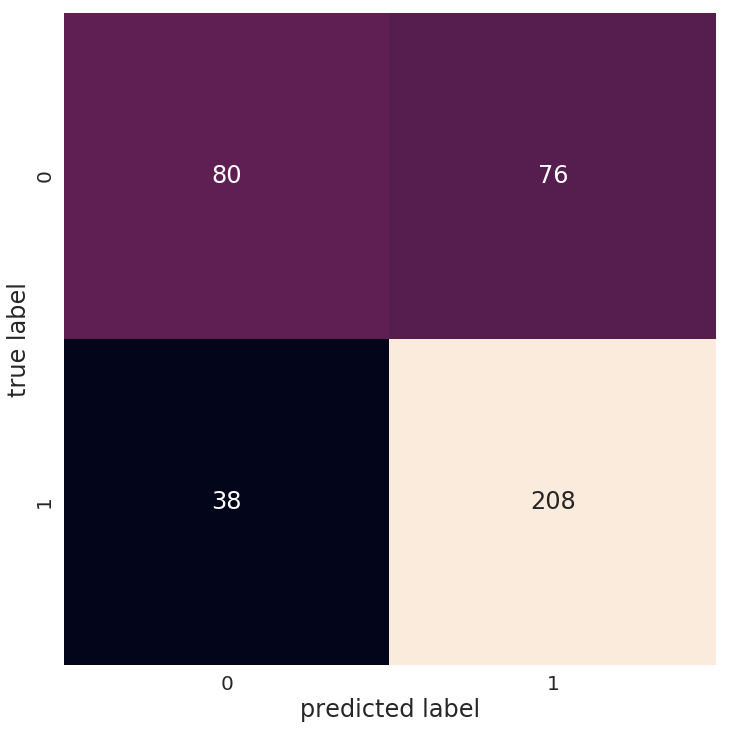

In [38]:
from sklearn.metrics import accuracy_score ,classification_report

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_pred, y_test)
sns.set(font_scale=2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('true label')
plt.xlabel('predicted label');

print(classification_report(y_test,y_pred,target_names=['0','1']))

In [38]:
#印出f1 score
y_pred = knn.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')  

0.7297297297297297

Accuracy:  0.6517412935323383
              precision    recall  f1-score   support

           0       0.56      0.47      0.51       156
           1       0.69      0.77      0.73       246

    accuracy                           0.65       402
   macro avg       0.63      0.62      0.62       402
weighted avg       0.64      0.65      0.64       402



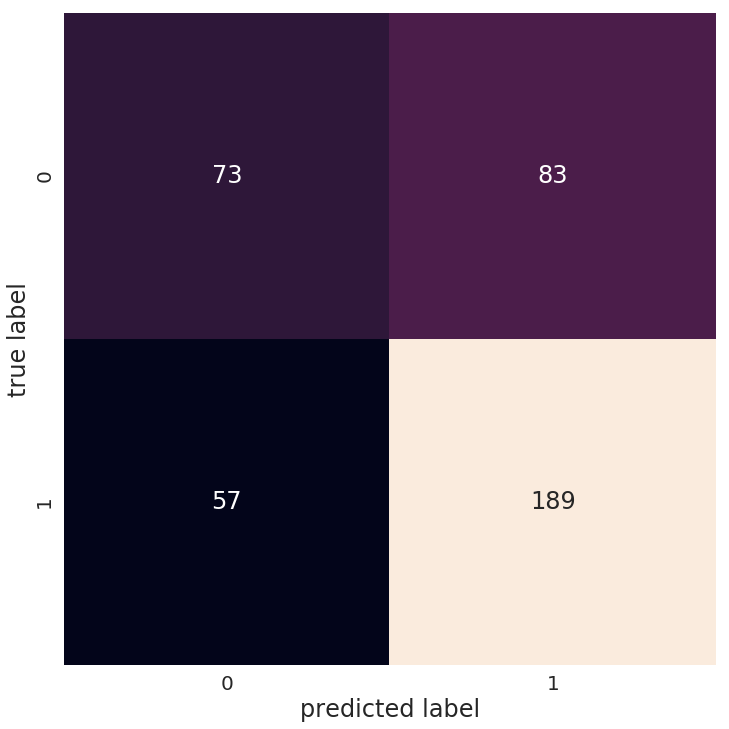

In [39]:
from sklearn.metrics import accuracy_score ,classification_report

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_pred, y_test)
sns.set(font_scale=2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('true label')
plt.xlabel('predicted label');

print(classification_report(y_test,y_pred,target_names=['0','1']))

# 做完了基本的接著嘗試增加特徵作看看
# 新增欄位 - 投丟次數與罰球丟失次數

In [12]:
#重新讀取
nba_new = pd.read_csv('nba_logreg.csv')

In [13]:
nba_new.shape

(1340, 21)

In [14]:
#新增丟失次數
nba_new['FG missed'] = nba_new['FGA'] - nba_new['FGM']
nba_new['FT missed'] = nba_new['FTA'] - nba_new['FTM']

In [15]:
#檢查欄位
nba_new[['FG missed','FT missed']].head(20)

,FG missed,FT missed
0,5.0,0.7
1,4.7,0.8
2,2.7,0.4
3,3.2,0.4
4,1.4,0.6
5,2.0,0.1
6,3.3,0.3
7,3.1,0.1
8,1.4,0.1
9,2.1,0.4


# 新增欄位 - 球員效率值
- EFF: efficiency: NBA's efficiency rating: EFF = (PTS + TREB + AST + STL + BLK) - (FGA - FGM) - (FTA - FTM) - TO 

In [16]:
nba_new['EFF'] = (nba_new['PTS']+nba_new['REB']+nba_new['AST']+nba_new['STL']+nba_new['BLK'])-nba_new['FG missed']-nba_new['FT missed']-nba_new['TOV']

In [17]:
#檢查是否有小於0
(nba_new[['EFF']]<0).sum()

EFF    0
dtype: int64

In [18]:
#重新排序LABEL
nba_new = nba_new[['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'FG missed', 'FT missed', 'EFF','TARGET_5Yrs']]

In [19]:
#查看key值是否正確
nba_new.keys()

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'FG missed', 'FT missed', 'EFF', 'TARGET_5Yrs'],
      dtype='object')

# 再次畫出熱力圖觀察相關性

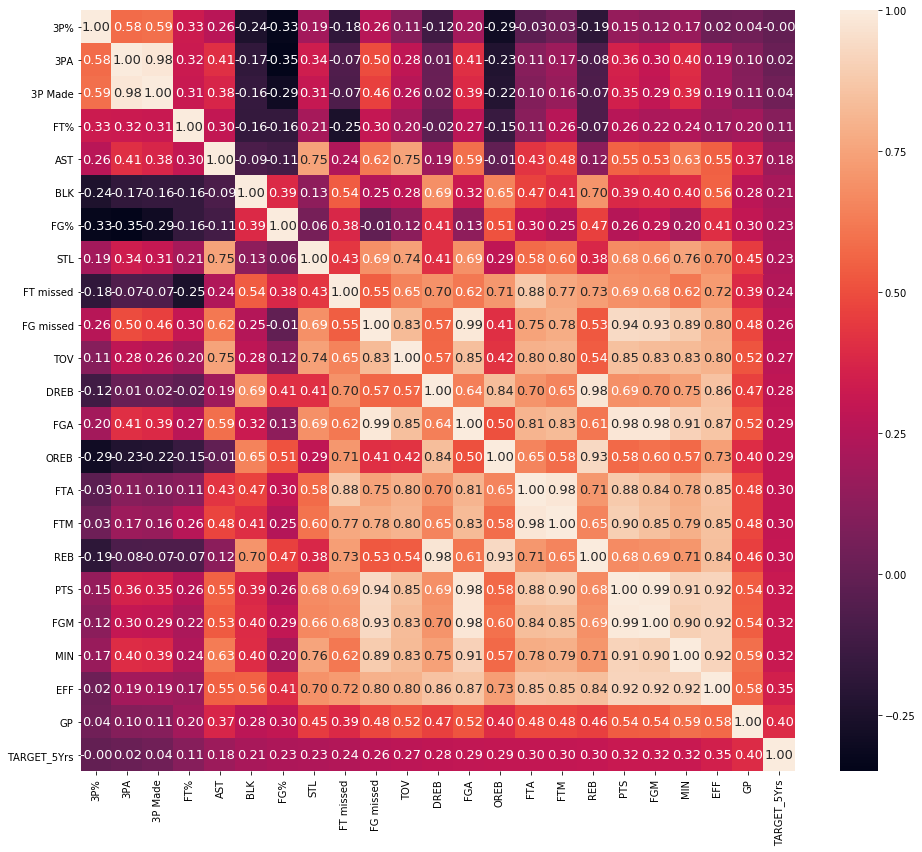

In [20]:
#畫出heatmap
plt.rcParams['figure.figsize'] = (16,14)

#取index當作排序的依據
sort_columns = nba_new.corr().sort_values('TARGET_5Yrs').index
corr = nba_new[sort_columns].corr()

#annot為在上面呈現的數字
#".2f"表示float类型保留小数点后两位。
sns.heatmap(corr, annot=corr, fmt = '.2f',annot_kws={"size": 13})

AxesSubplot(0.127273,0.125;0.617727x0.755)


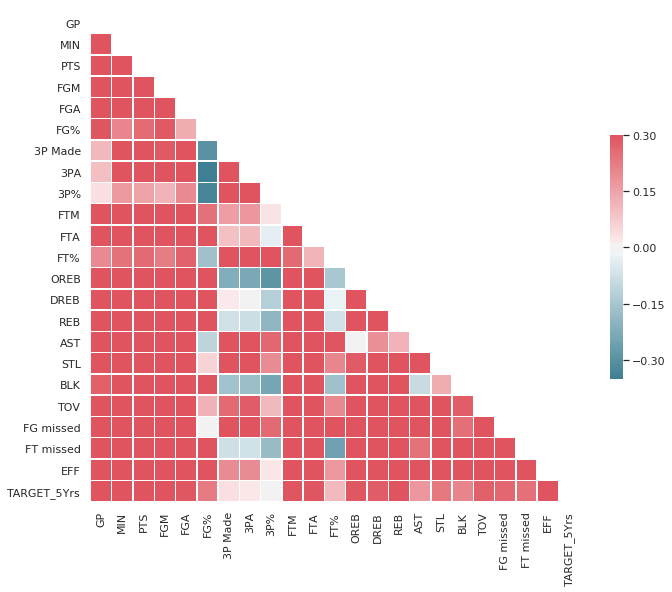

In [21]:
#另一種heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D 

sns.set(style="white")

d = nba_new

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

# 補缺值

In [22]:
nba_new['3P%'] = nba_new['3P%'].fillna(0)

In [23]:
nba_new.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
FG missed      0
FT missed      0
EFF            0
TARGET_5Yrs    0
dtype: int64

# 切分資料

In [24]:
X_new = nba_new.iloc[:,1:-1]
y_new = nba_new.iloc[:,23]

In [53]:
#可查看是否正確
#y_new

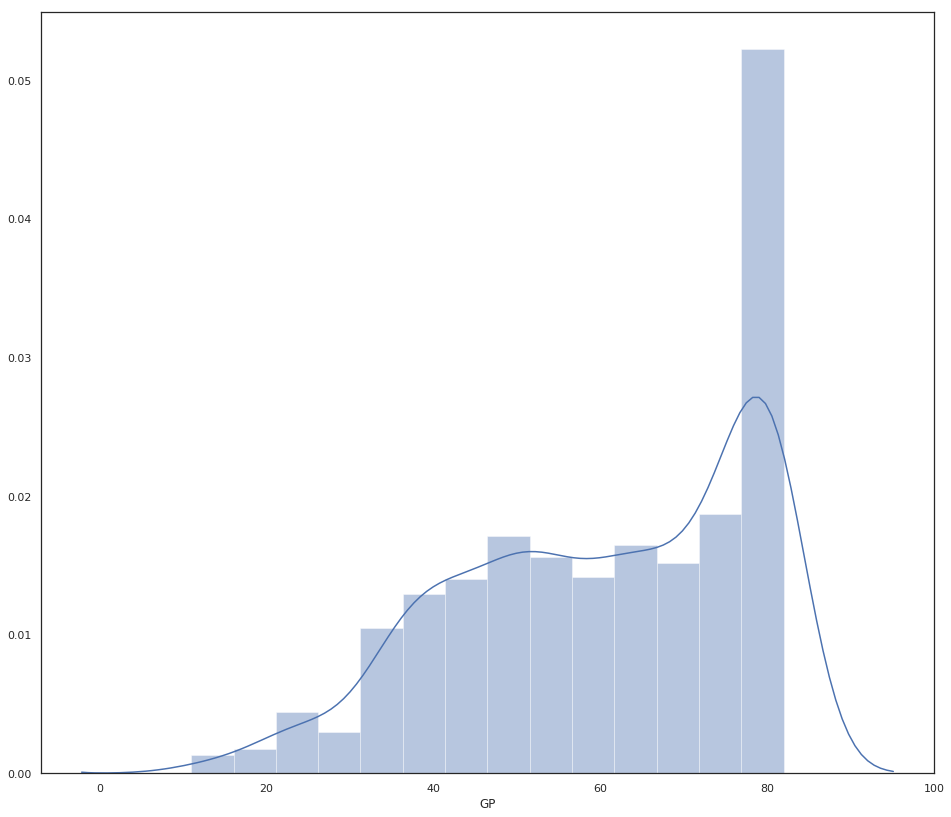

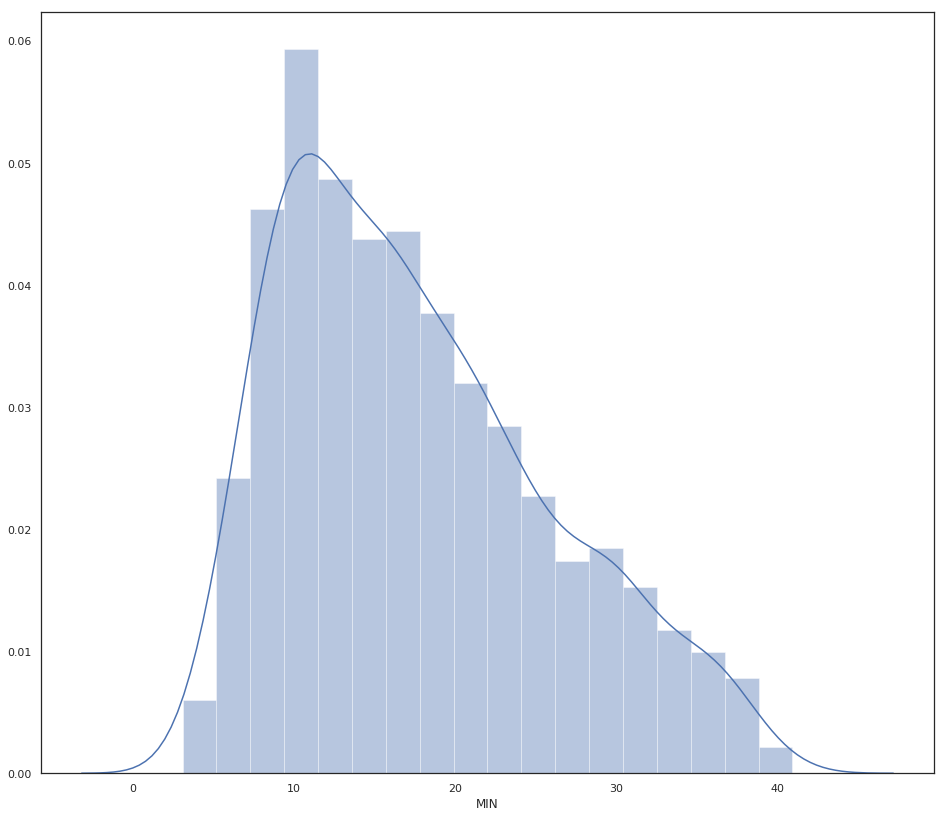

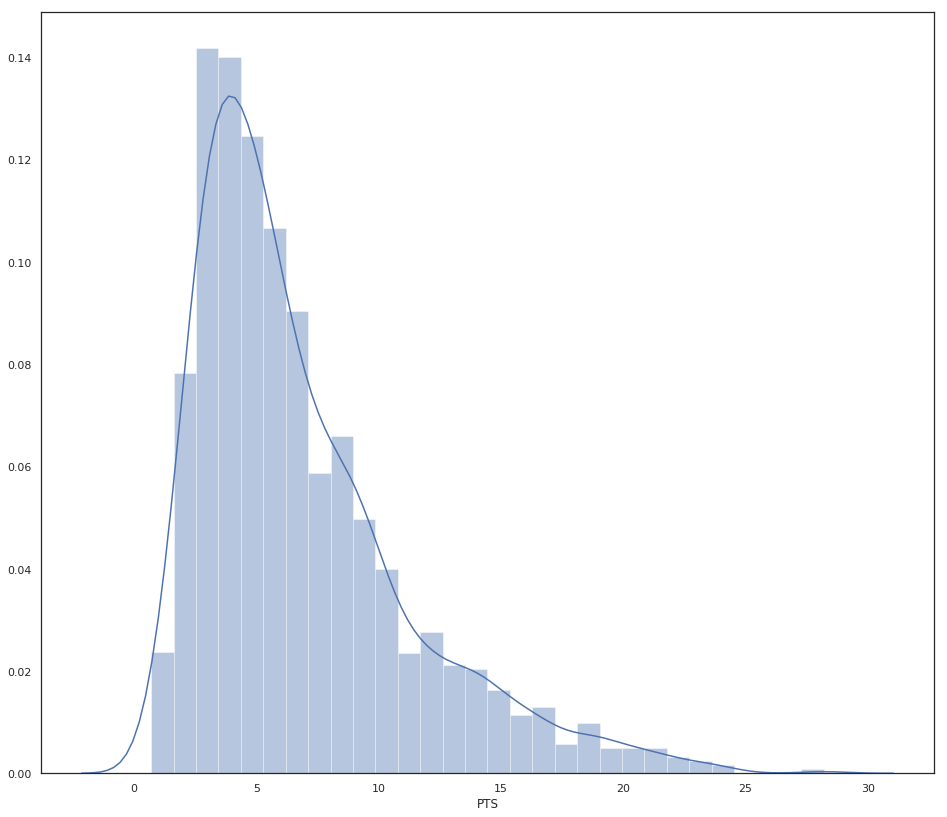

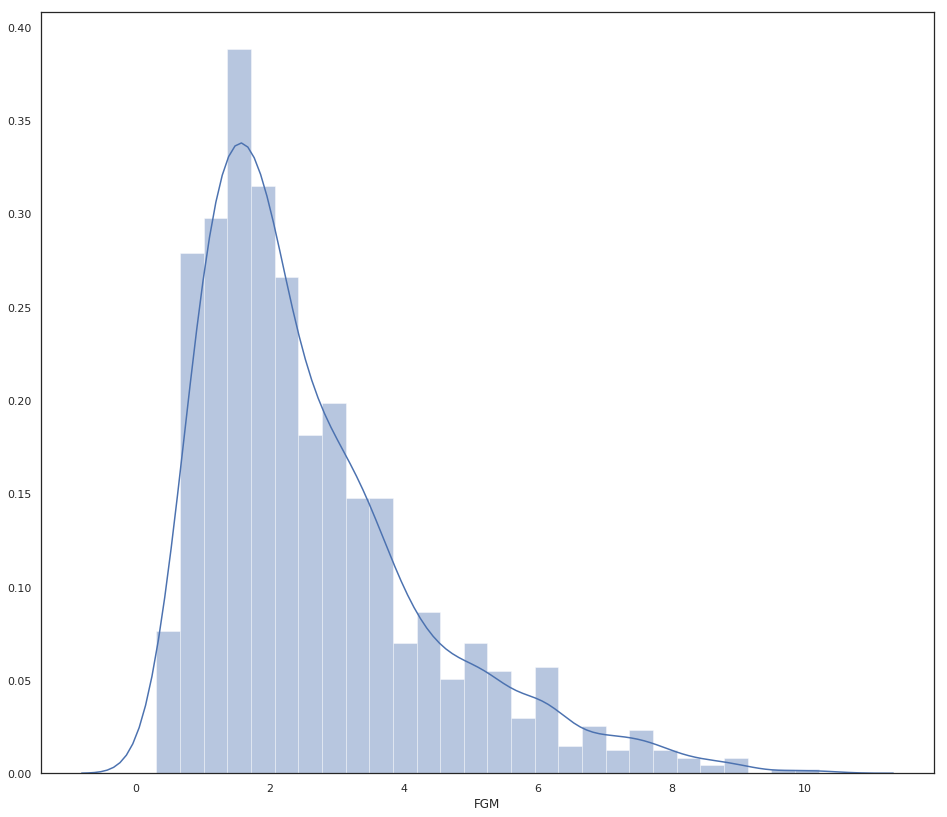

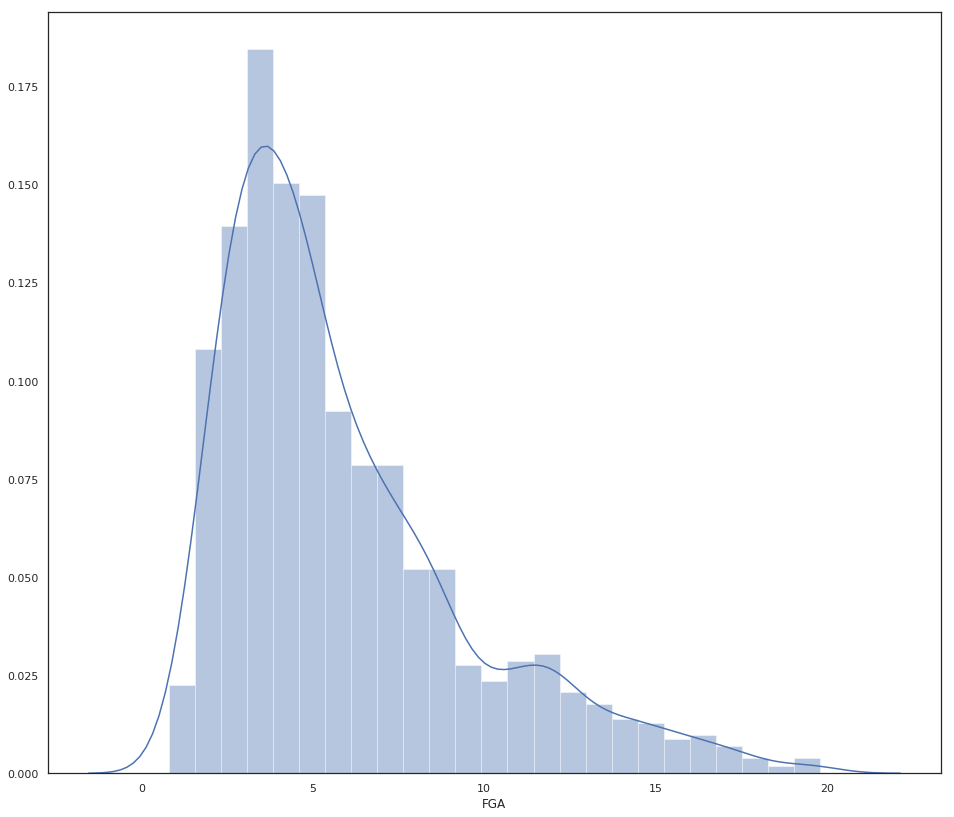

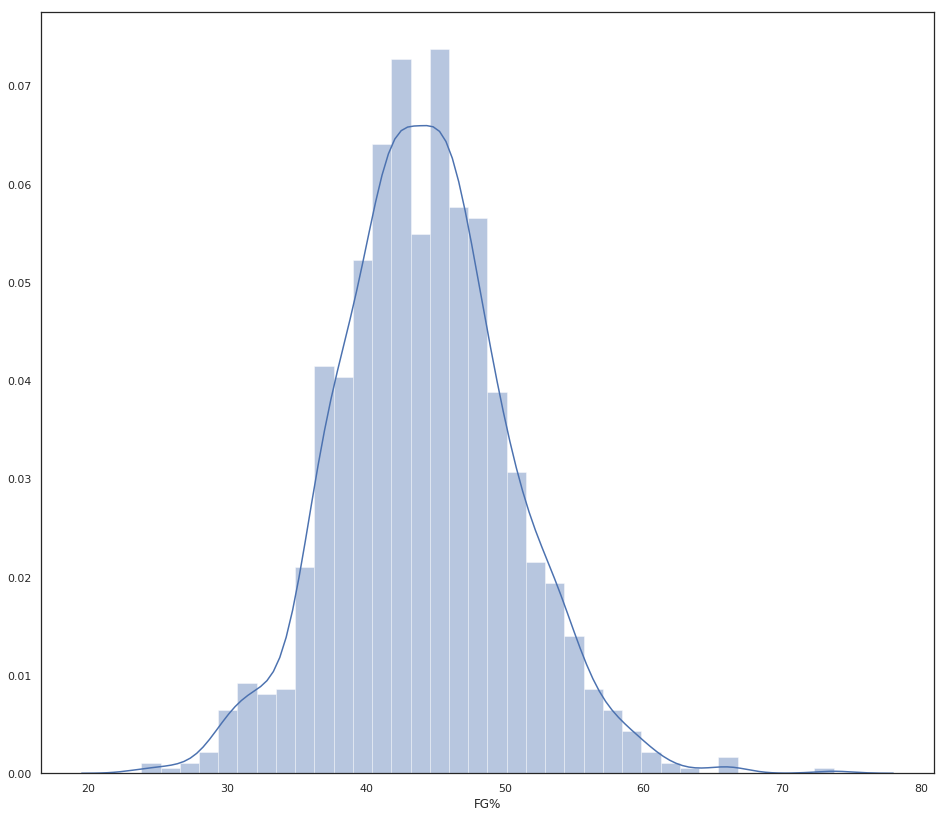

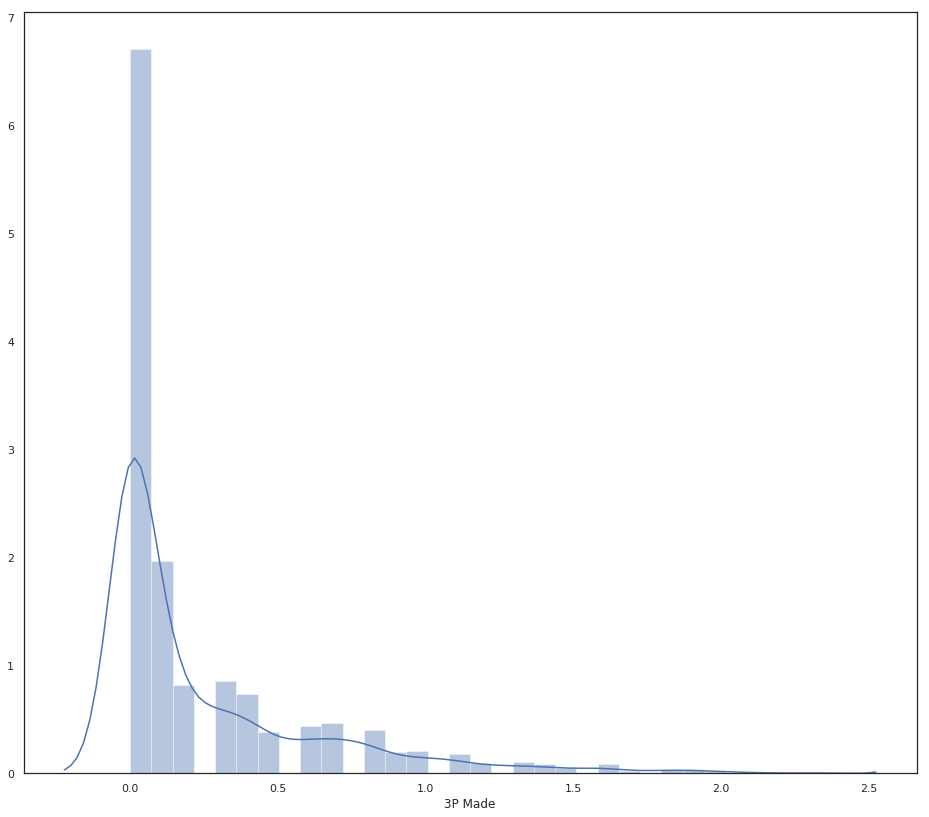

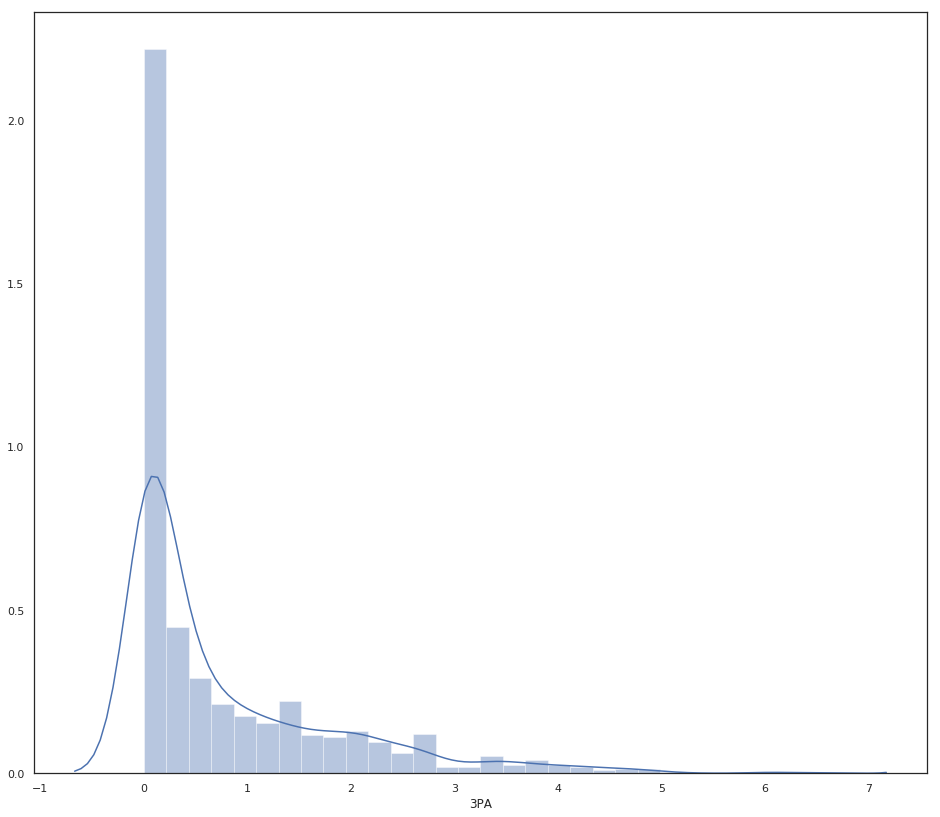

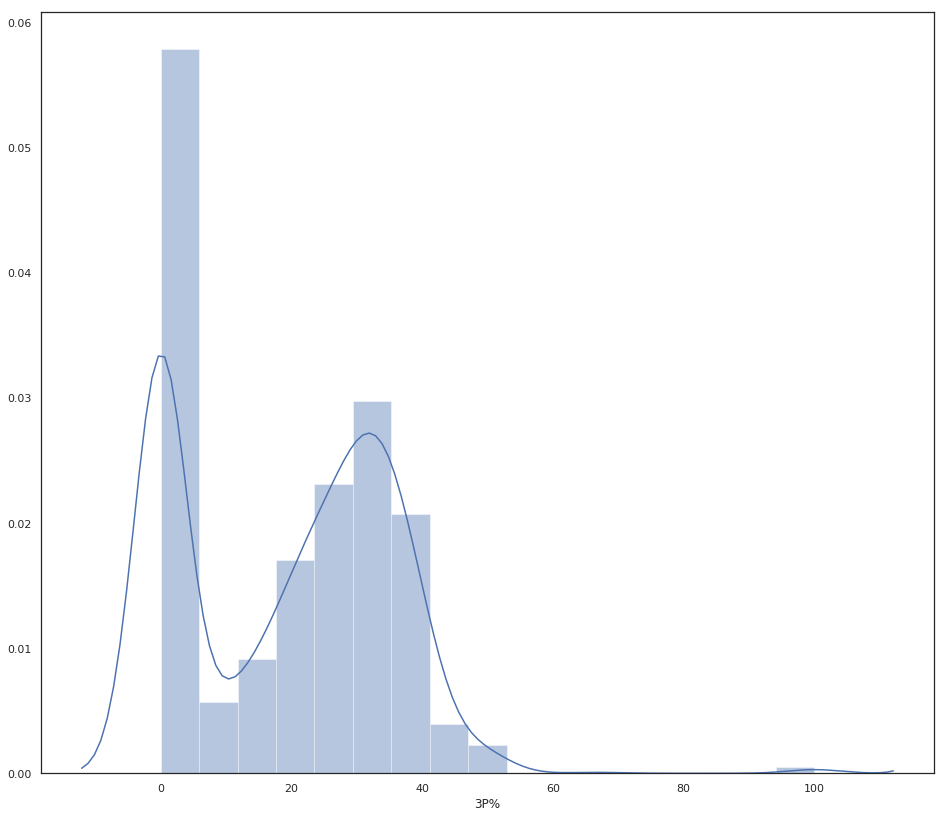

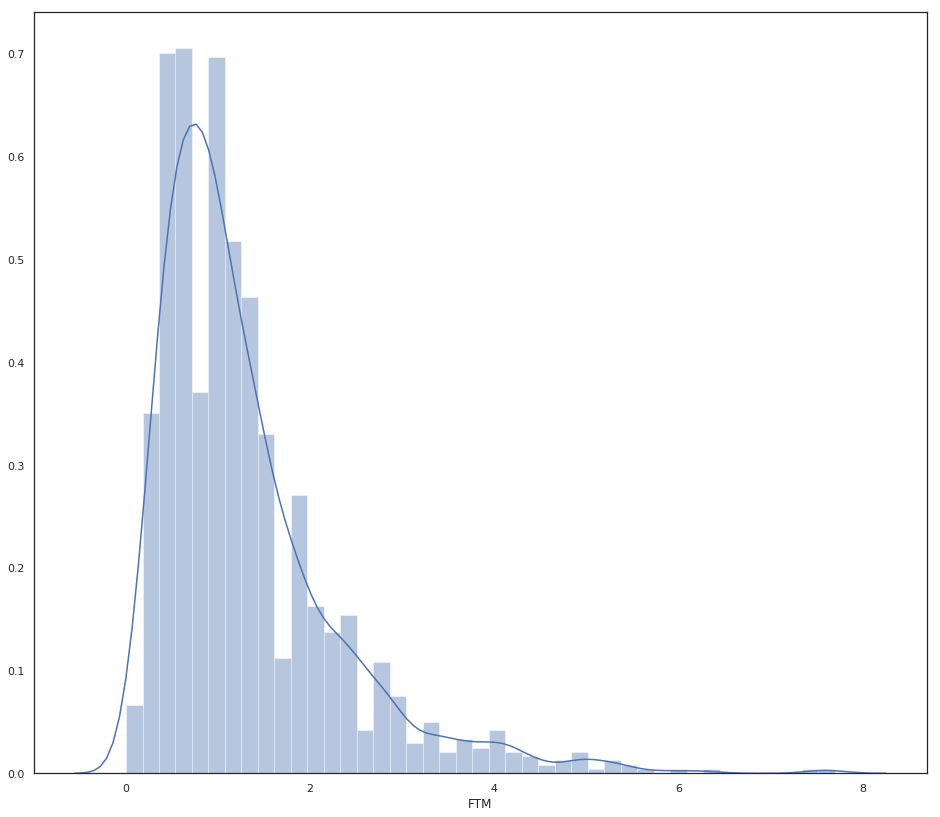

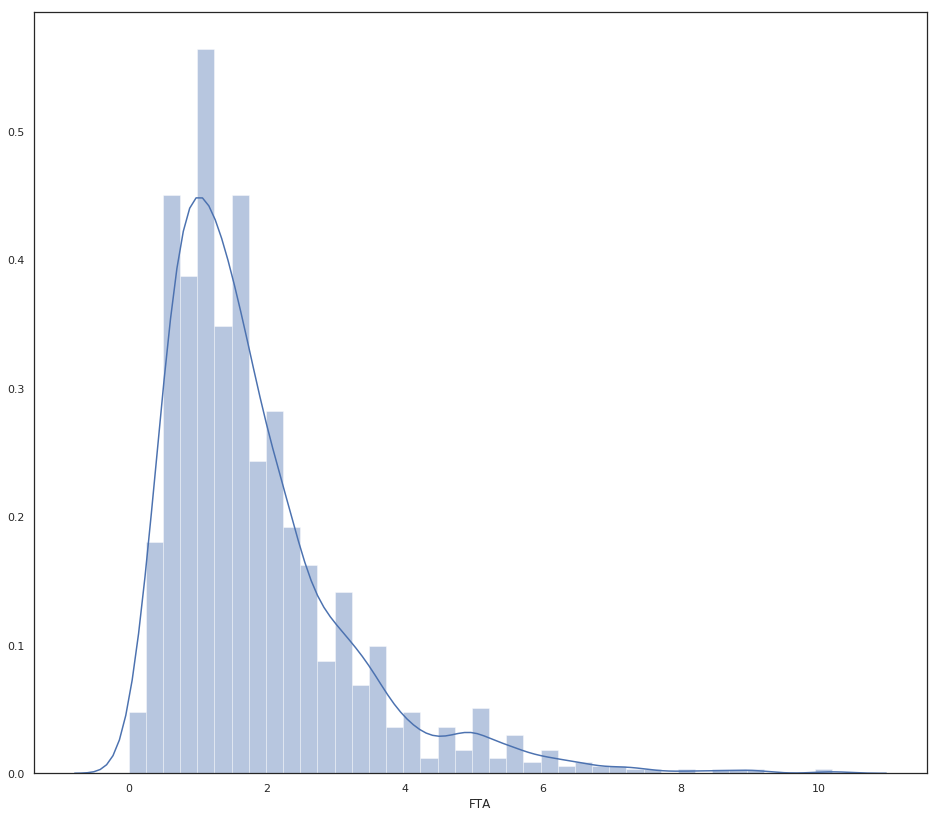

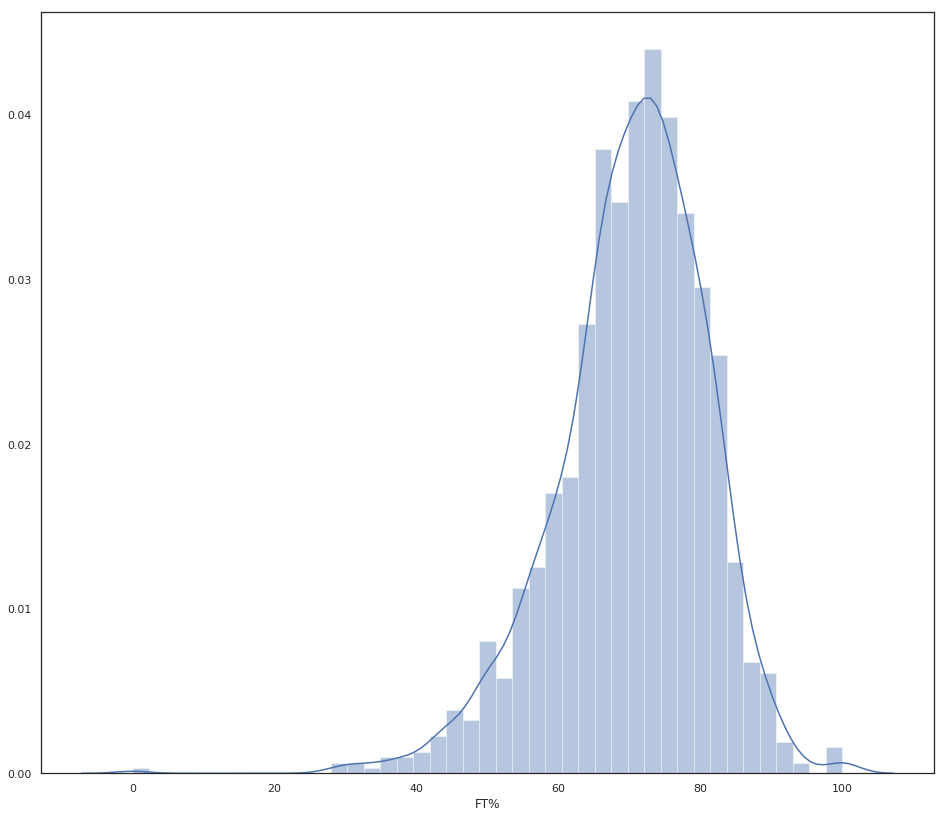

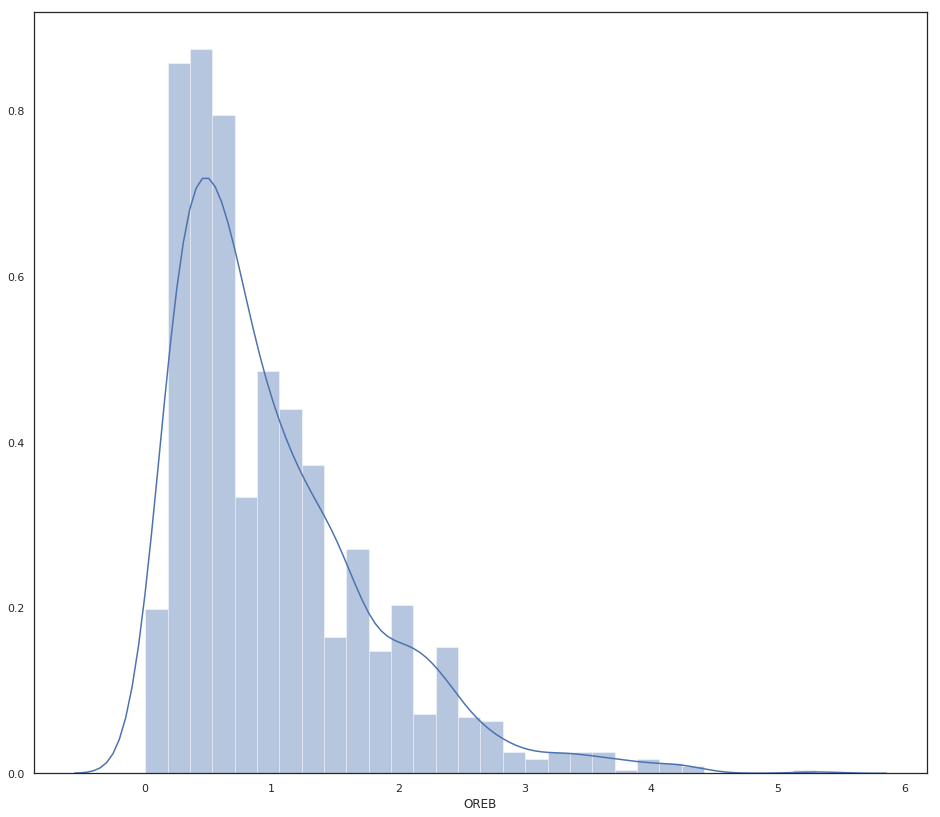

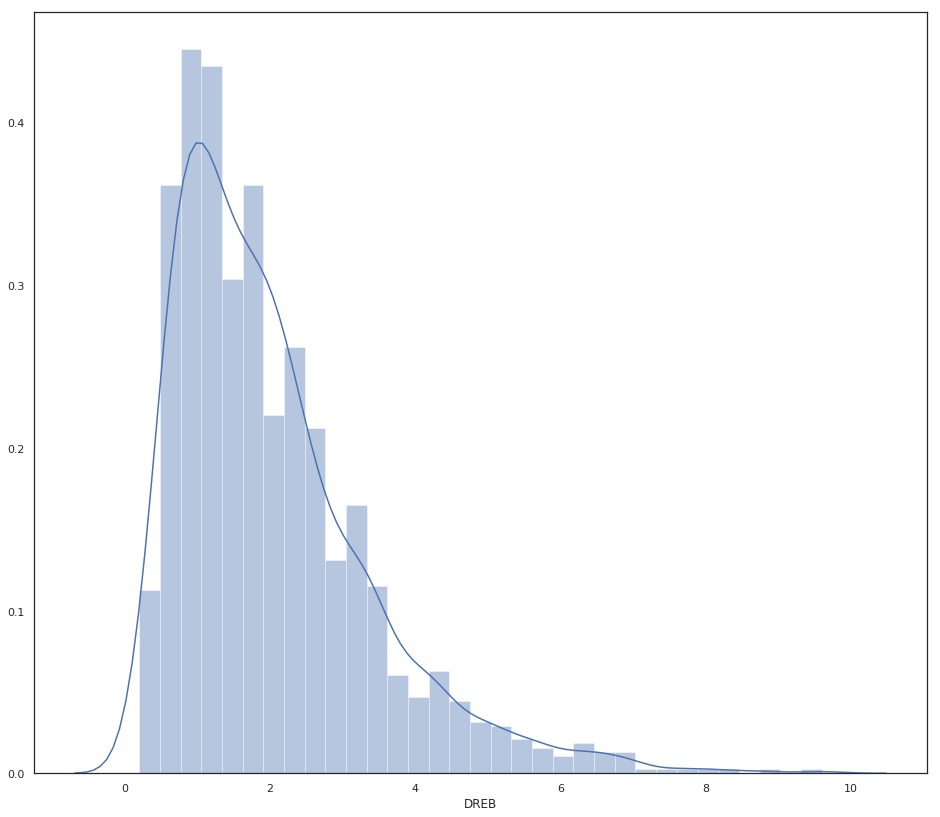

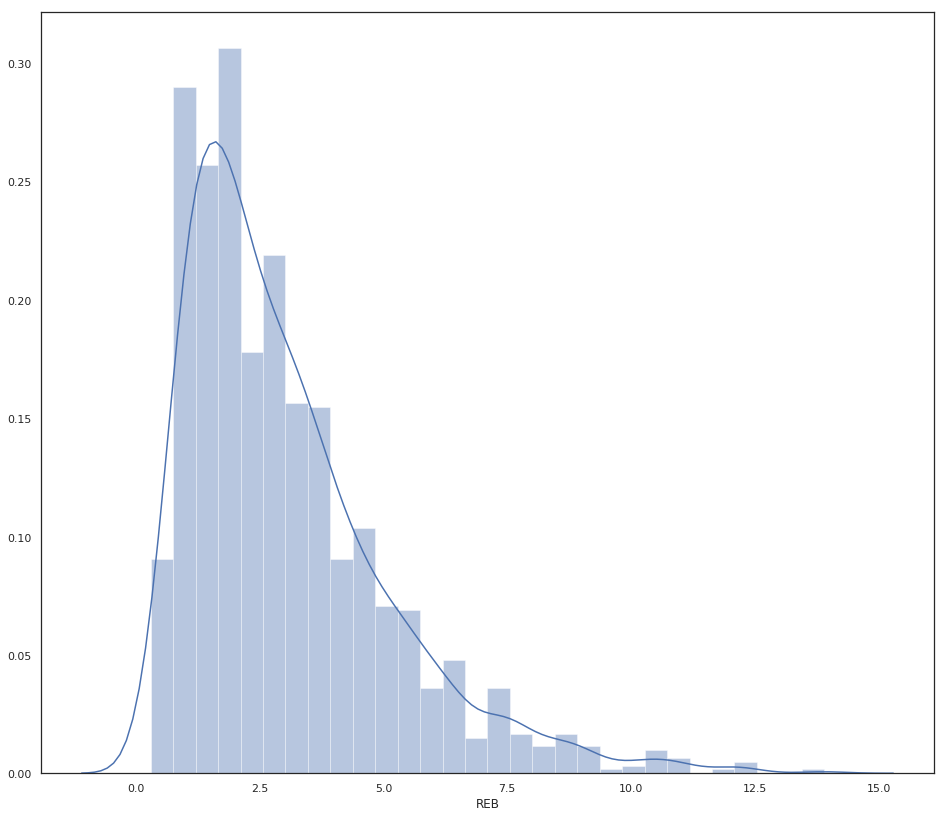

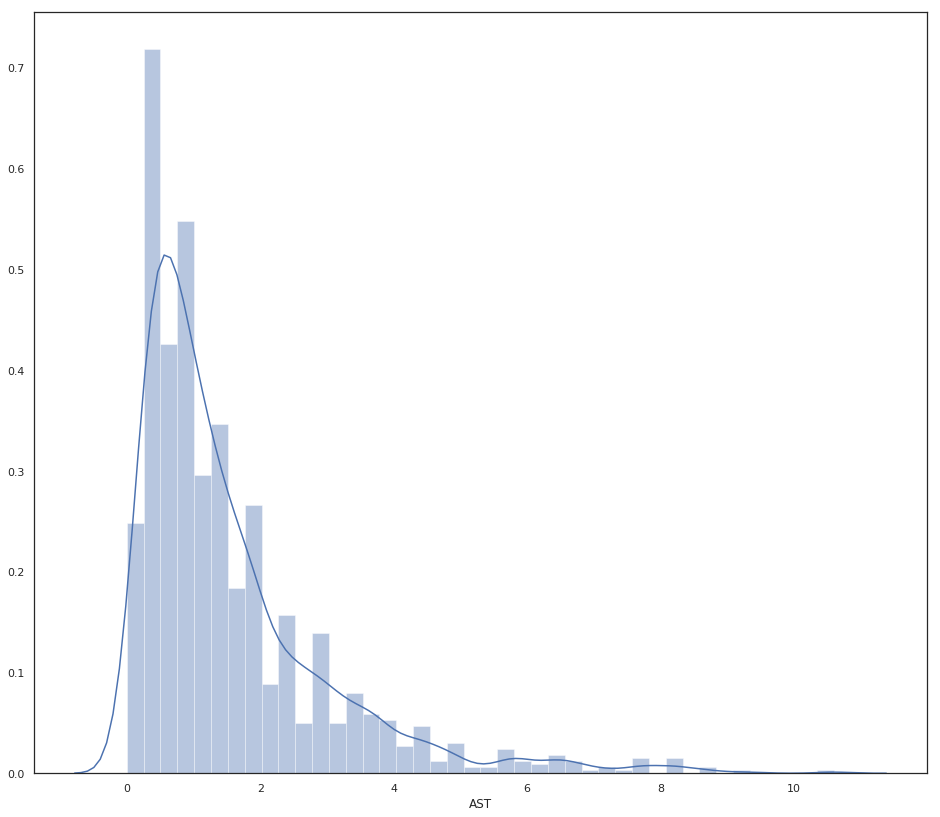

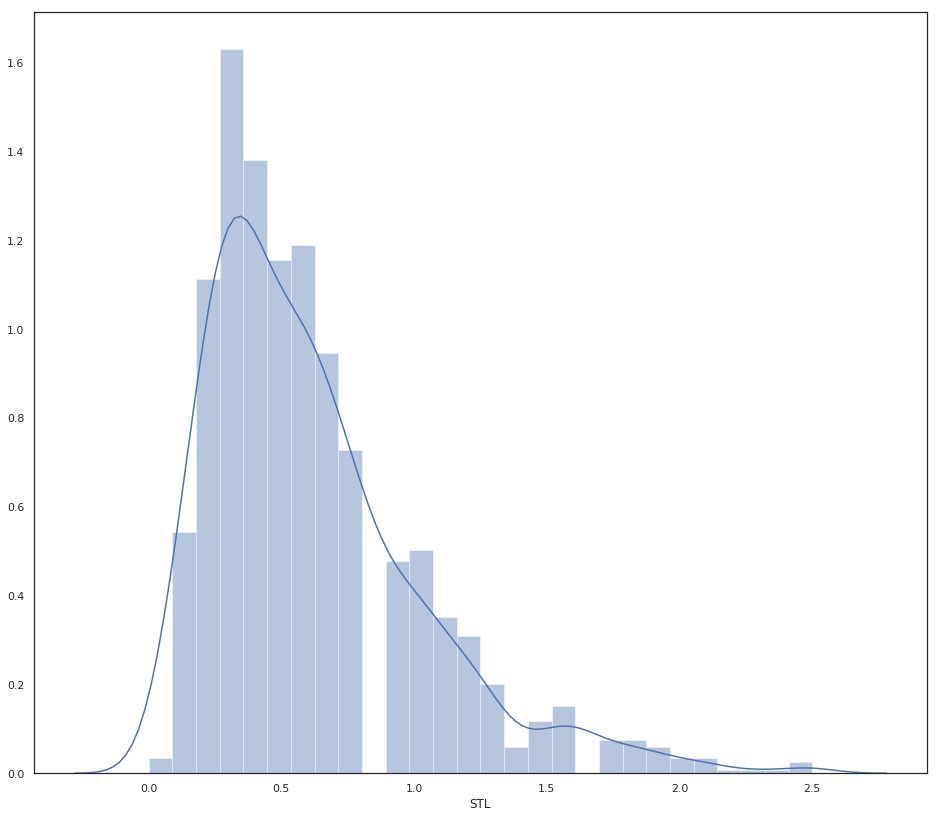

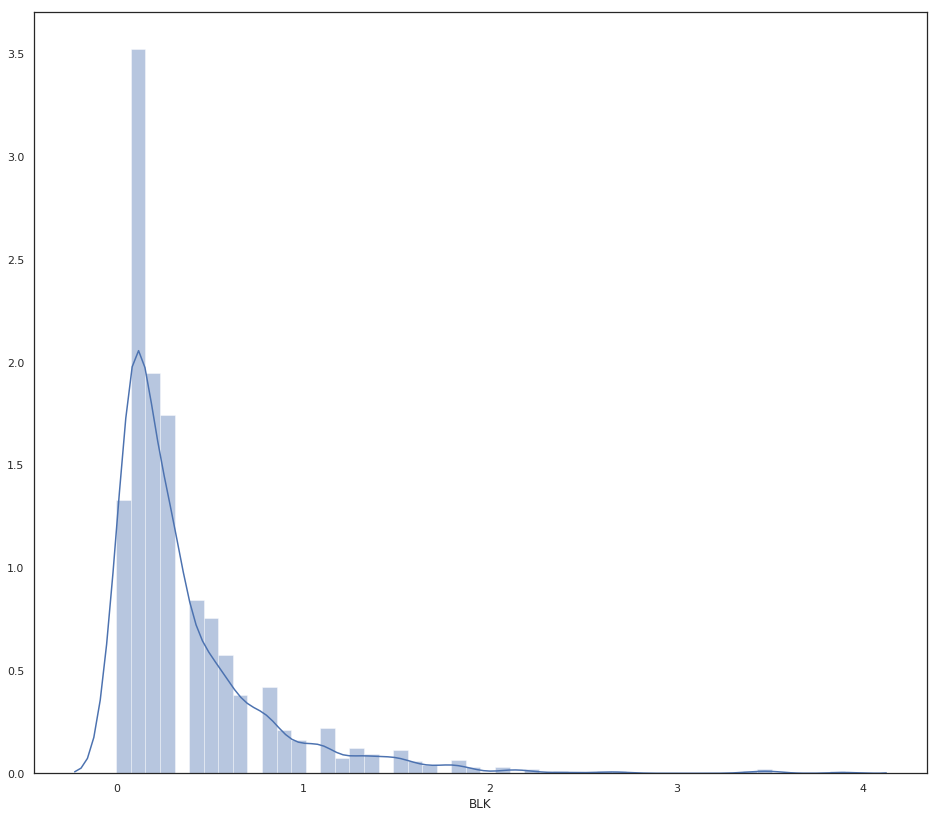

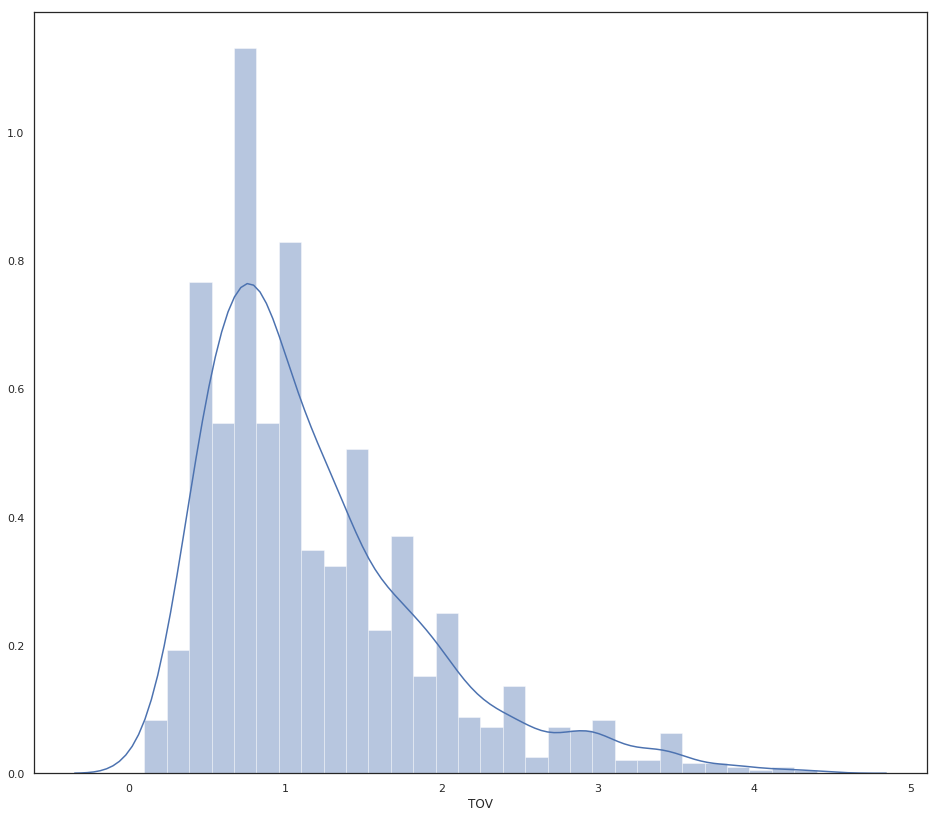

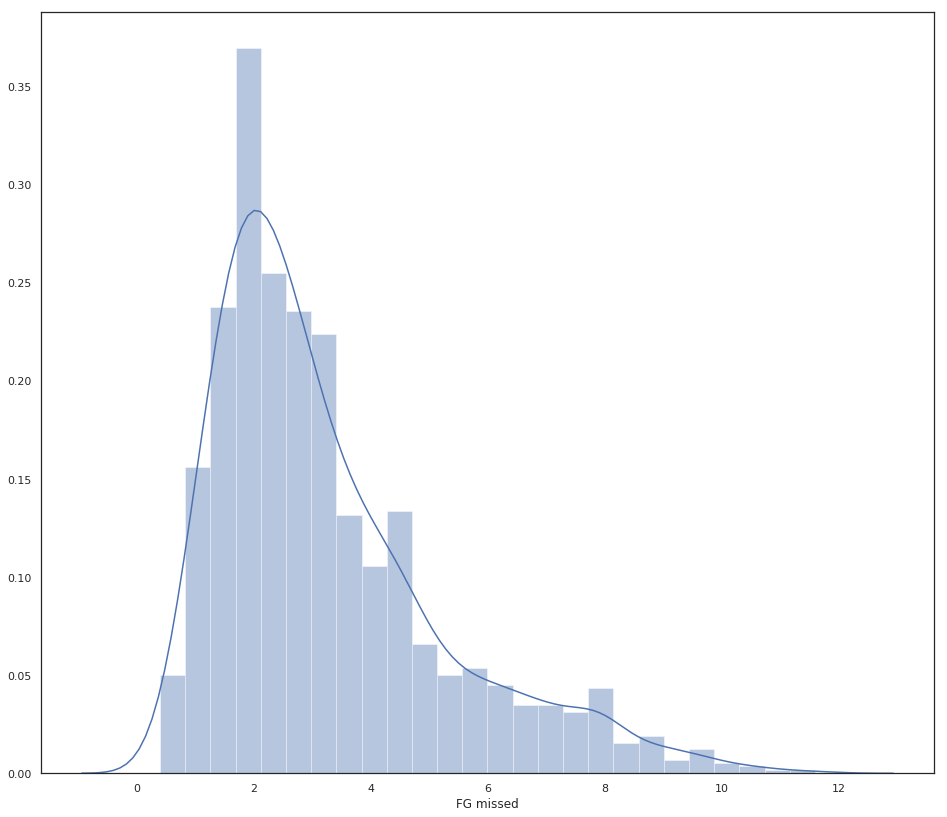

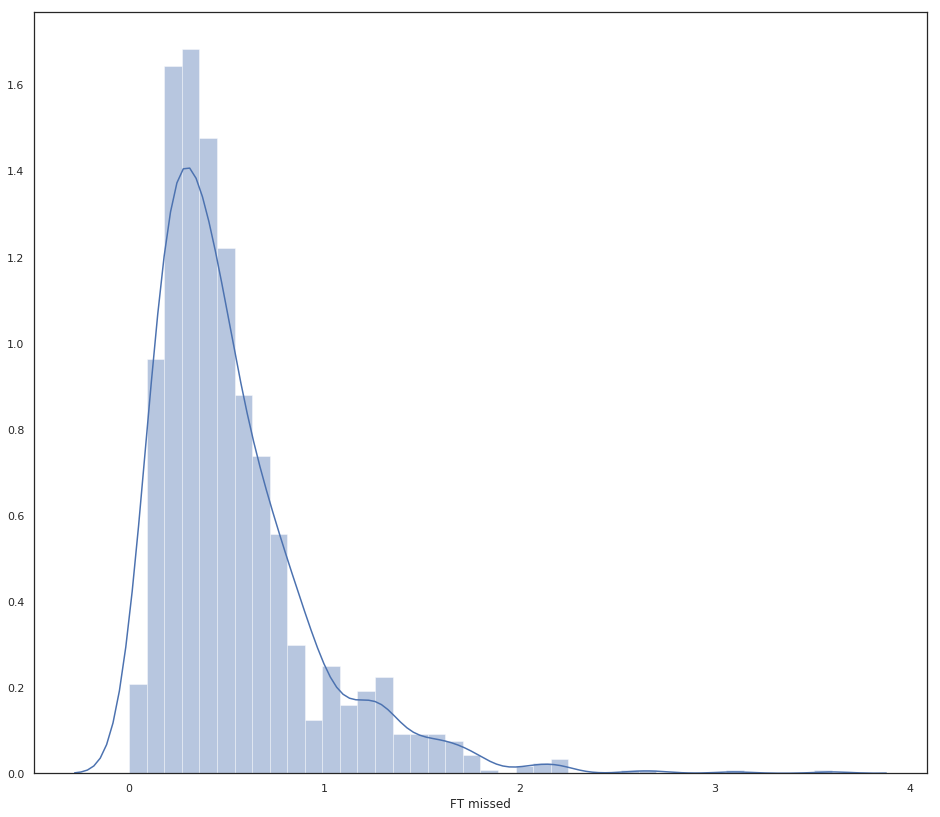

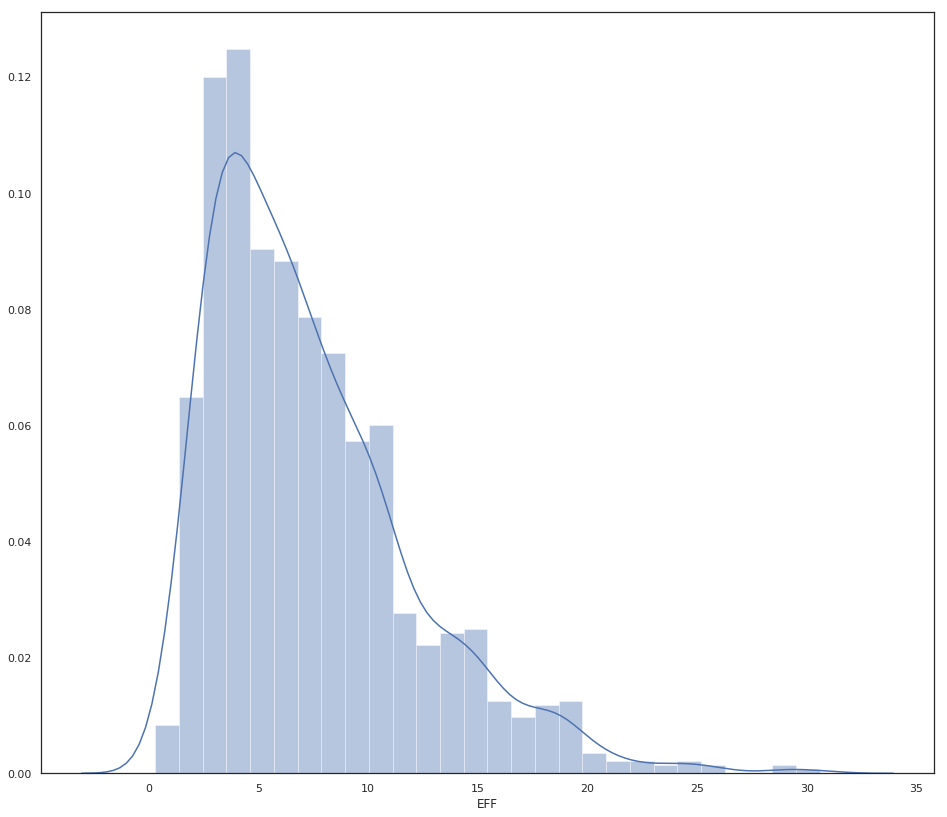

In [26]:
#可將distplot畫出查看偏態
for i in X_new:
    sns.distplot(nba_new[i])
    plt.show()

# 切分資料

In [54]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.3,random_state=42)

In [55]:
print(X_train_new.shape)
print(X_test_new.shape)
print(y_train_new.shape)
print(y_test_new.shape)

(938, 22)
(402, 22)
(938,)
(402,)


# 資料標準化

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_new = sc.fit_transform(X_train_new)
X_test_new = sc.transform(X_test_new)

# LogisticRegression

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_new, y_train_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred_new = classifier.predict(X_test_new)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_new, y_pred_new)
cm

array([[ 79,  77],
       [ 33, 213]])

In [59]:
from sklearn.metrics import f1_score
f1_score(y_test_new, y_pred_new, average='binary')  

0.7947761194029851

Accuracy:  0.7263681592039801
              precision    recall  f1-score   support

           0       0.71      0.51      0.59       156
           1       0.73      0.87      0.79       246

    accuracy                           0.73       402
   macro avg       0.72      0.69      0.69       402
weighted avg       0.72      0.73      0.72       402



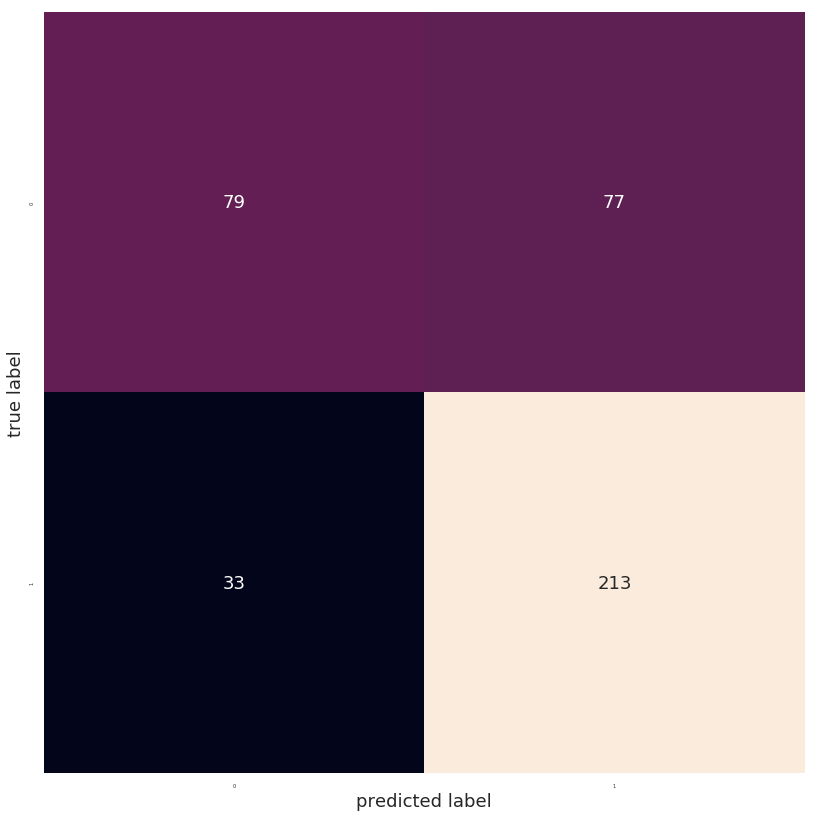

In [60]:
y_pred_new = classifier.predict(X_test_new)

from sklearn.metrics import accuracy_score ,classification_report

acc = accuracy_score(y_test_new, y_pred_new)
print("Accuracy: ", acc)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_pred_new, y_test_new)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.ylabel('true label')
plt.xlabel('predicted label');

print(classification_report(y_test_new,y_pred_new,target_names=['0','1']))

# SVM

In [61]:
from sklearn.svm import SVC
#classifier = SVC(kernel = 'linear')
classifier = SVC(C=1, gamma='auto', kernel='rbf', probability=True)
classifier.fit(X_train_new, y_train_new)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Accuracy:  0.7263681592039801
              precision    recall  f1-score   support

           0       0.71      0.51      0.59       156
           1       0.73      0.87      0.79       246

    accuracy                           0.73       402
   macro avg       0.72      0.69      0.69       402
weighted avg       0.72      0.73      0.72       402



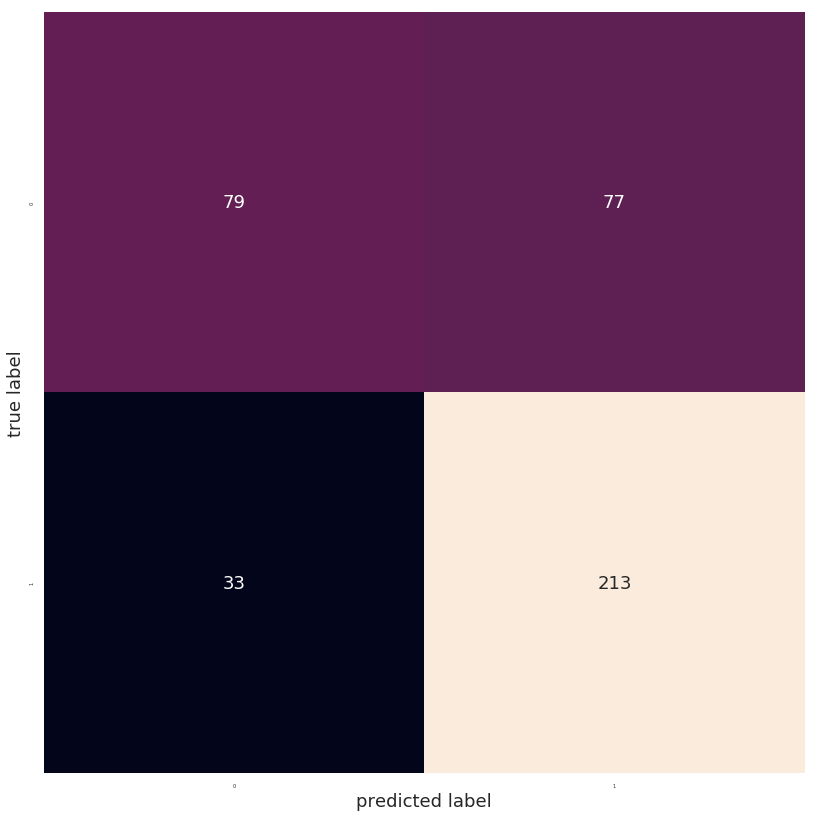

In [62]:
y_pred = classifier.predict(X_test_new)

from sklearn.metrics import accuracy_score ,classification_report

acc = accuracy_score(y_test_new, y_pred_new)
print("Accuracy: ", acc)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_pred_new, y_test_new)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.ylabel('true label')
plt.xlabel('predicted label');

print(classification_report(y_test_new,y_pred_new,target_names=['0','1']))

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(3, weights='uniform', algorithm = 'kd_tree', leaf_size = 10)
knn.fit(X_train_new, y_train_new)
print("Knn accuracy:" , knn.score(X_train_new, y_train_new))

Knn accuracy: 0.7974413646055437


# 隱藏用法

# XGBoost

In [60]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_new,y_train_new)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

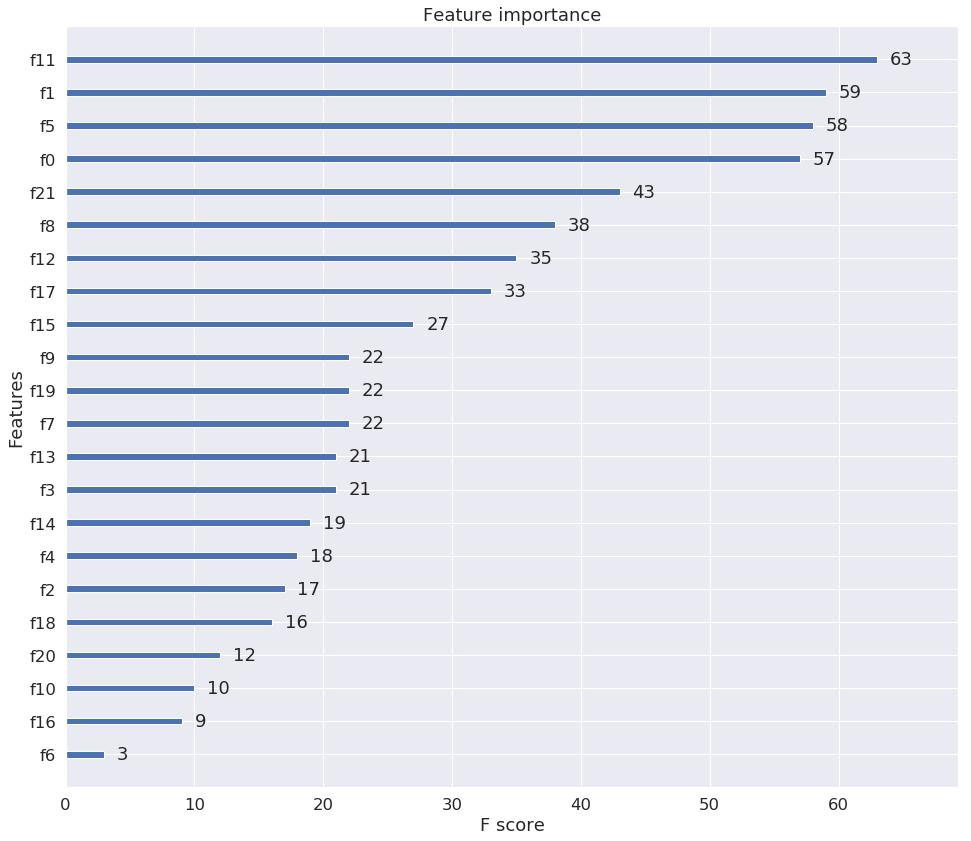

In [61]:
from xgboost import plot_importance
plot_importance(xgbc)
plt.show()

In [62]:
y_pred = xgbc.predict(X_test_new)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_new, y_pred)
cm

array([[ 72,  84],
       [ 38, 208]])

In [63]:
from sklearn.metrics import f1_score
f1_score(y_test_new, y_pred, average='binary')

0.7732342007434945

In [64]:
from sklearn.metrics import accuracy_score ,classification_report
acc = accuracy_score(y_test_new, y_pred)

Accuracy:  0.6965174129353234
              precision    recall  f1-score   support

           0       0.65      0.46      0.54       156
           1       0.71      0.85      0.77       246

   micro avg       0.70      0.70      0.70       402
   macro avg       0.68      0.65      0.66       402
weighted avg       0.69      0.70      0.68       402



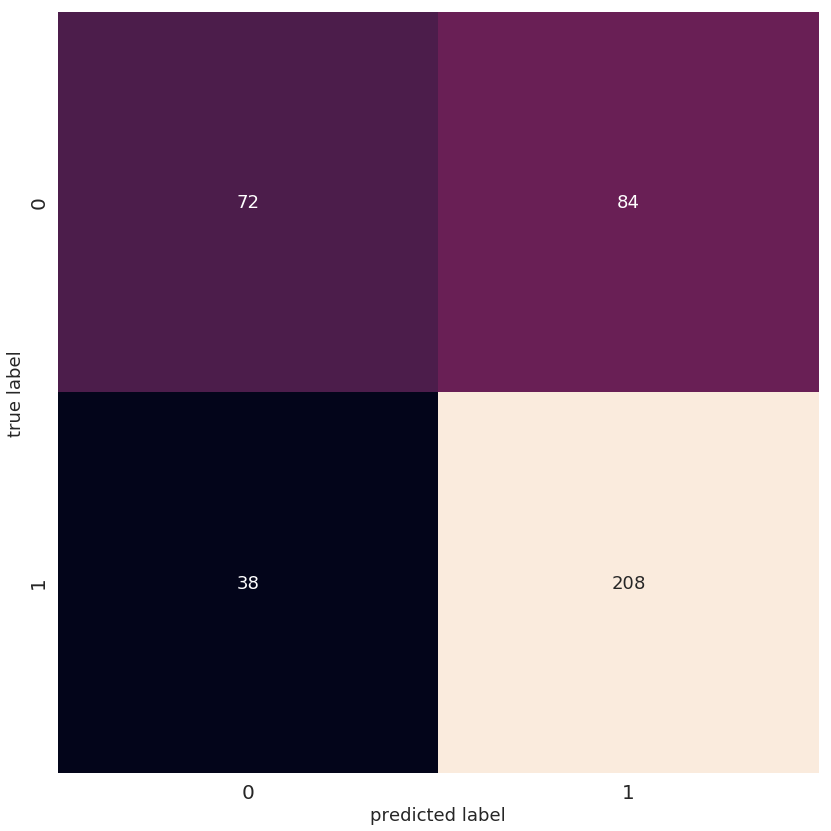

In [65]:
#y_pred = xgbc.predict(X_test_new)

from sklearn.metrics import accuracy_score ,classification_report

acc = accuracy_score(y_test_new, y_pred)
print("Accuracy: ", acc)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_pred, y_test_new)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('true label')
plt.xlabel('predicted label');

print(classification_report(y_test,y_pred,target_names=['0','1']))